In [1]:
! pip install -U git+https://github.com/Adapter-Hub/adapter-transformers.git
! pip install datasets

  Cloning https://github.com/Adapter-Hub/adapter-transformers.git to /tmp/pip-req-build-s2wjvbtl
  Running command git clone -q https://github.com/Adapter-Hub/adapter-transformers.git /tmp/pip-req-build-s2wjvbtl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for adapter-transformers: filename=adapter_transformers-2.0.1-cp37-none-any.whl size=2099116 sha256=26e4154c81460ea0e42e8599075746087fa19f18a7ed9f7269fd4cd29277800a
  Stored in directory: /tmp/pip-ephem-wheel-cache-78__kvsa/wheels/b0/56/c9/5bf1c51cd513412090ad751ab10fc025210176bf0a82dd8af3
Successfully built adapter-transformers
  Found existing installation: adapter-transformers 2.0.1
    Uninstalling adapter-transformers-2.0.1:
      Successfully uninstalled adapter-transformers-2.0.1


In [5]:
cd drive/MyDrive/CAMemBERT-Adapters/

/content/drive/MyDrive/CAMemBERT-Adapters


Using custom data configuration default-188fe162b5bdb039


Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-188fe162b5bdb039/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0. Subsequent calls will reuse this data.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModelWithHeads: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModelWithHeads from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModelWithHeads from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch,Training Loss,Validation Loss,Loss,Spearmanr,Cohen Kappa,Pearsonr
1,No log,2.748128,2.762881,0.659828,-0.019215,-0.785876
2,No log,2.721106,2.735242,0.677317,-0.003008,-0.393383
3,No log,0.040297,0.038470,0.664366,0.036603,0.321120
4,No log,0.014613,0.012465,0.676798,0.044178,0.266159
5,No log,0.014215,0.012006,0.671758,0.048682,0.279645


{'train_loss': 2.762880563735962, 'train_spearmanr': 0.6482459221650082, 'train_cohen_kappa': -0.02101415399865947, 'train_pearsonr': -0.8912143497083751, 'eval_loss': 2.7481281757354736, 'eval_spearmanr': 0.6598278776452232, 'eval_cohen_kappa': -0.019214505598592613, 'eval_pearsonr': -0.7858760376099434}
{'train_loss': 2.7352418899536133, 'train_spearmanr': 0.7103746265848255, 'train_cohen_kappa': -0.00453449216898294, 'train_pearsonr': -0.39520526478462203, 'eval_loss': 2.7211060523986816, 'eval_spearmanr': 0.677316787822728, 'eval_cohen_kappa': -0.0030083622272076838, 'eval_pearsonr': -0.39338280002166415}
{'train_loss': 0.038469694554805756, 'train_spearmanr': 0.7294170495926454, 'train_cohen_kappa': 0.04381445760578273, 'train_pearsonr': 0.39526428595346774, 'eval_loss': 0.04029696062207222, 'eval_spearmanr': 0.6643664685934145, 'eval_cohen_kappa': 0.03660337015730797, 'eval_pearsonr': 0.3211202866220233}
{'train_loss': 0.012464859522879124, 'train_spearmanr': 0.7392296993098026, 

Overwriting existing adapter 'r2_bert_adaptors_fce_essays_dev_set_5epochs_16bs_4E-5lr_1layers_froze_fce_essays'.
Overwriting existing head 'r2_bert_adaptors_fce_essays_dev_set_5epochs_16bs_4E-5lr_1layers_froze_fce_essays'



__________test set results__________


{'eval_loss': 0.01223765965551138, 'eval_spearmanr': 0.6740522959589673, 'eval_cohen_kappa': 0.01882848772464829, 'eval_pearsonr': 0.39151254379065203}
_________plotting history__________
defaultdict(<class 'list'>, {('_loss', 'train'): [2.762880563735962, 2.7352418899536133, 0.038469694554805756, 0.012464859522879124, 0.012005600146949291], ('_spearmanr', 'train'): [0.6482459221650082, 0.7103746265848255, 0.7294170495926454, 0.7392296993098026, 0.7446345438675879], ('_cohen_kappa', 'train'): [-0.02101415399865947, -0.00453449216898294, 0.04381445760578273, 0.04601035242458662, 0.05330310016958517], ('_pearsonr', 'train'): [-0.8912143497083751, -0.39520526478462203, 0.39526428595346774, 0.3268833233398851, 0.35698532396478677], ('_loss', 'eval'): [2.7481281757354736, 2.7211060523986816, 0.04029696062207222, 0.014613328501582146, 0.014215012080967426], ('_spearmanr', 'eval'): [0.6598278776452232, 0.677316787822728, 0.6643664685934145, 0.6767975895395882, 0.6717575967440339], ('_cohen_ka

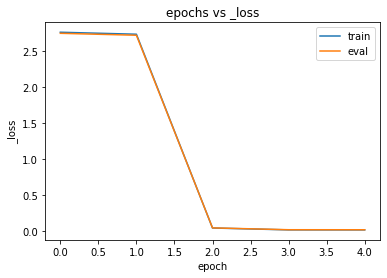

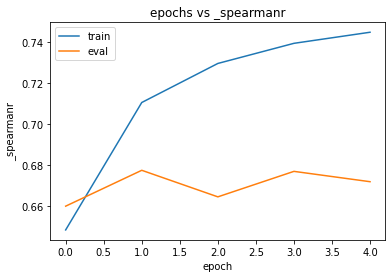

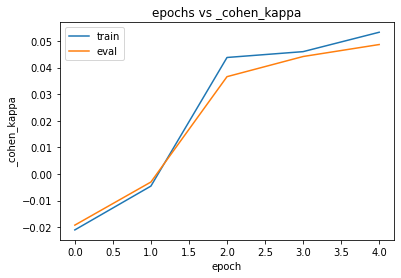

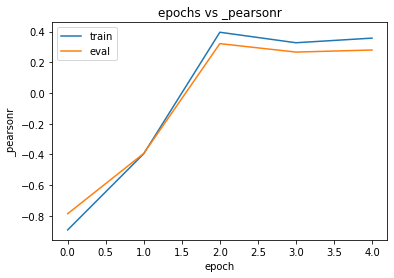

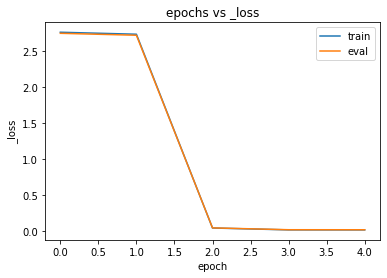

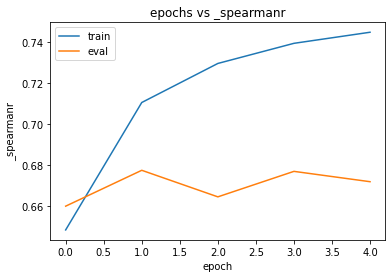

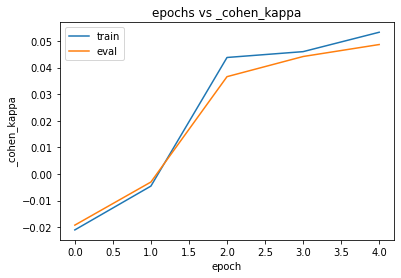

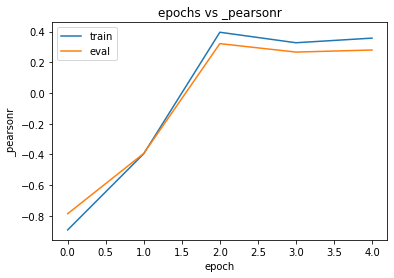

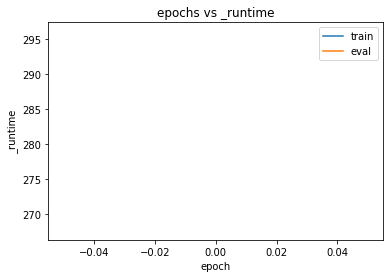

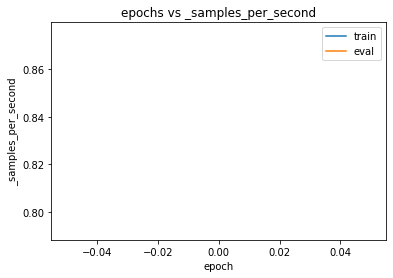

In [7]:
# import os, sys
# currentdir = os.path.dirname(os.path.realpath(__file__))
# preprocess_mod_ind = currentdir.split('/').index('CAMemBERT-Adapters')
# preprocess_mod_path = '/'.join(currentdir.split('/')[:preprocess_mod_ind+1])
# sys.path.append(preprocess_mod_path)
from transformers import AutoTokenizer,EarlyStoppingCallback,TrainingArguments
from datasets import load_dataset,load_metric
from src.utils.preprocessing import read_pickle_file
from src.models.adaptor_models import R2BERTAdaptors
from src.models.trainers import R2Trainer
from src.models.running import *
from sklearn.metrics import r2_score,cohen_kappa_score
import torch

def encode_batch(batch):
  """Encodes a batch of input data using the model tokenizer."""
  return tokenizer(batch[tokenize_col], max_length=max_n_tokens, truncation=True, padding="max_length")

def compute_metrics(p):
    #####################################################
    # Here is where the error lies p.predictions returns only 30 
    # predictions for the training arguments and parameters set below
    logits, labels = p.predictions,p.label_ids
    metrics_dic = metric.compute(predictions=logits, references=labels)
    metrics_dic['cohen_kappa'] = cohen_kappa_score(logits,labels)
    metrics_dic['pearsonr'] = r2_score(labels, logits)
    return metrics_dic

es = 2
lr = 4e-5
bs = 16
epochs = 5
frozen_layers = 1
metric_for_best_model = 'pearsonr'
dev = True

tokenize_col='essays'
max_n_tokens=512
extra_cols_for_dataset=['essay_set','norm_scores']

params = generate_parameters(es,lr,bs,epochs,frozen_layers,metric_for_best_model,dev,max_n_tokens)

pre_trained_model_name = 'bert-base-uncased'
dataset_title = 'fce_essays'
task = 'aes'
subtask = 'regression'
abrev_name = f'r2_bert_adaptors_{dataset_title}'

file_paths = generate_file_paths(dataset_title,task,subtask,params,abrev_name)

dataset_dic = {'train':file_paths['train_file_path'],'test':file_paths['test_file_path'],'val':file_paths['val_file_path']}

dataset = load_dataset('csv', data_files=dataset_dic)
tokenizer = AutoTokenizer.from_pretrained(pre_trained_model_name)
dataset = dataset.map(encode_batch, batched=True)
dataset.set_format(type="torch", columns=["input_ids", "attention_mask","labels"]+extra_cols_for_dataset)

min_max_dic = {}
min_max_dic['min_scores'] = {1:0}
min_max_dic['ranges'] = {1:40}

adaptor_name=f'{file_paths["full_model_name"]}_{dataset_title}'
model = R2BERTAdaptors(pre_trained_model_name,norm_params=min_max_dic,dynamic=True,adaptor_names=adaptor_name)
model.activate_adapters()
model = model.model
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

metric = load_metric("spearmanr")

training_args = base_training_args(params,file_paths)

callbacks = [EarlyStoppingCallback(es)]

trainer = R2Trainer(model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["val"],
    compute_metrics=compute_metrics,
    callbacks=callbacks,)

trainer.train()

print()
print('__________test set results__________')
trainer.evaluate(dataset['test'],testing=True)
hist = trainer.state.log_history[-1]
eval_data = generate_eval_data(hist,params,task,subtask,pre_trained_model_name)
update_evaluation_results_for_this_model(f'{file_paths["evaluation_file_this_model"]}',eval_data)
update_evaluation_results_for_subtask(file_paths)

print('_________plotting history__________')
trainer.plot_history(file_paths['plots_path'],f'{file_paths["full_model_name"]}')